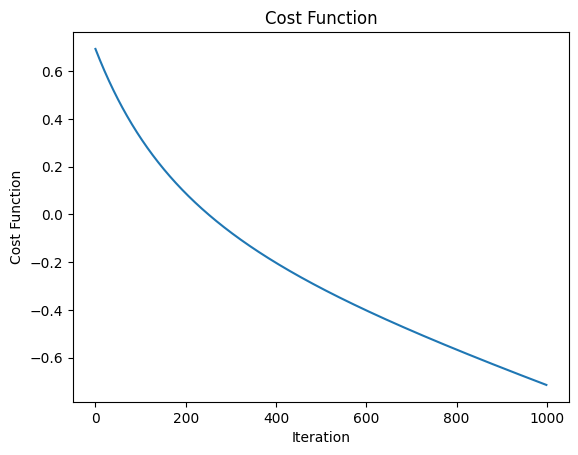

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Read data from CSV file into a DataFrame
df = pd.read_csv(r'E:\NUST-dairy\Module\Project\AI-Data.csv')

# Define the features and target variable
features = ['raisedhands', 'VisITedResources', 'AnnouncementsView']
target = 'Class'

# Convert the target variable to numerical using label encoding
le = LabelEncoder()
df[target] = le.fit_transform(df[target])

# Split the data into training and test sets
X = df[features]
y = df[target]

# Normalize the features
X = (X - X.mean()) / X.std()

# Add bias term to X
X = np.c_[np.ones(X.shape[0]), X]

# Define the learning rate and number of iterations
learning_rate = 0.01
num_iterations = 1000

# Initialize the parameters with zeros
num_features = X.shape[1]
theta = np.zeros(num_features)

# Perform gradient descent and track the cost function values
cost_values = []
for _ in range(num_iterations):
    # Calculate the predicted values using sigmoid function
    y_pred = 1 / (1 + np.exp(-X.dot(theta)))
    
    # Calculate the cost function
    cost = (-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)).mean()
    cost_values.append(cost)
    
    # Calculate the gradient
    gradient = (1 / len(X)) * X.T.dot(y_pred - y)
    
    # Update the parameters
    theta = theta - learning_rate * gradient

# Plot the cost function values
plt.plot(range(num_iterations), cost_values)
plt.xlabel('Iteration')
plt.ylabel('Cost Function')
plt.title('Cost Function')
plt.show()